#  Assignment-Advanced Regression_Surprise Housing_P V Balaji


# Problem Statement 
- A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

# Assignment Solution

Below are contents of the solution:
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation

## 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
shousing = pd.read_csv('train.csv')

In [4]:
shousing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(shousing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Summary of the dataset:** 1460 rows, 81 columns

<Axes: xlabel='SalePrice', ylabel='Density'>

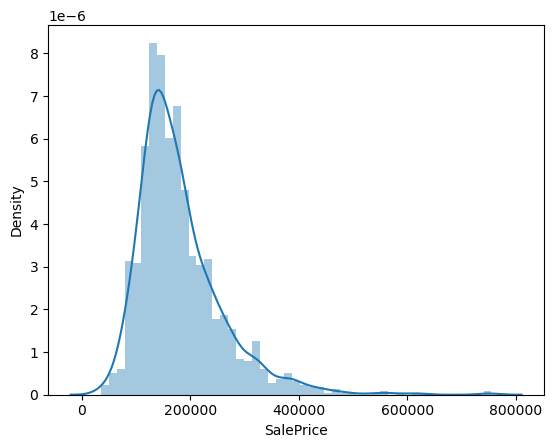

In [6]:
sns.distplot(shousing['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

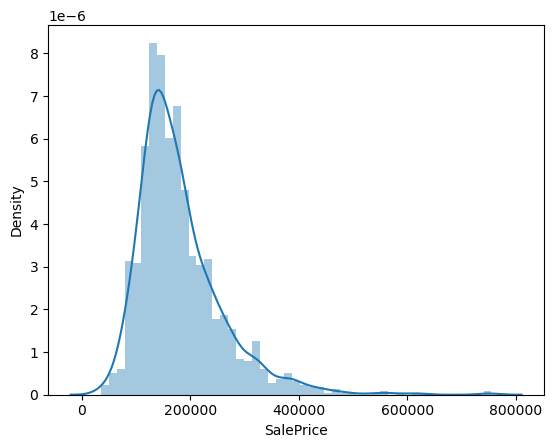

In [7]:
sns.distplot(shousing['SalePrice'])

<Axes: >

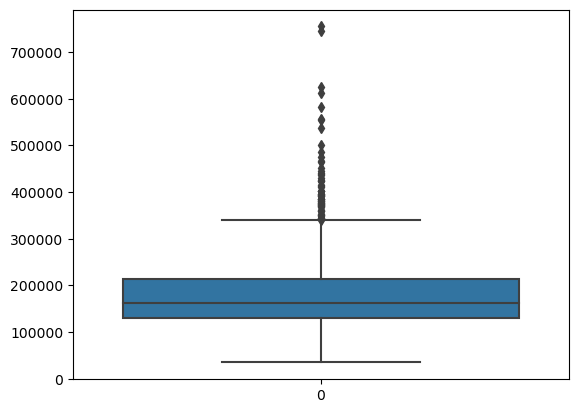

In [8]:
sns.boxplot(shousing['SalePrice'])

**Inference:** The target variable “SalePrice” is narrowly distributed with the median around 170000 

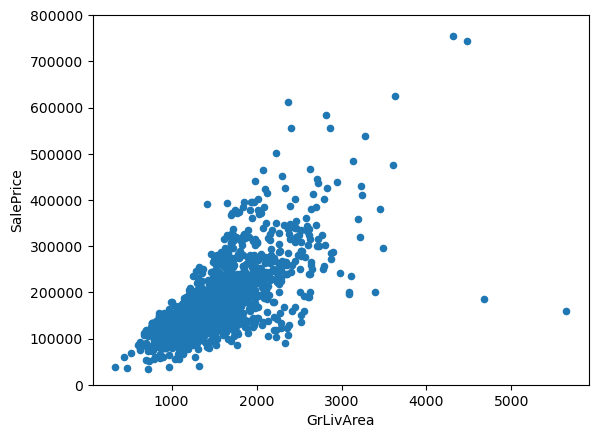

In [9]:
var = 'GrLivArea'
data = pd.concat([shousing['SalePrice'], shousing[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

**Inference:** As anticipated the predictor variable **“GrLivArea”**, i.e., living area square feet target has largely a linear relationship with target variable “SalePrice”

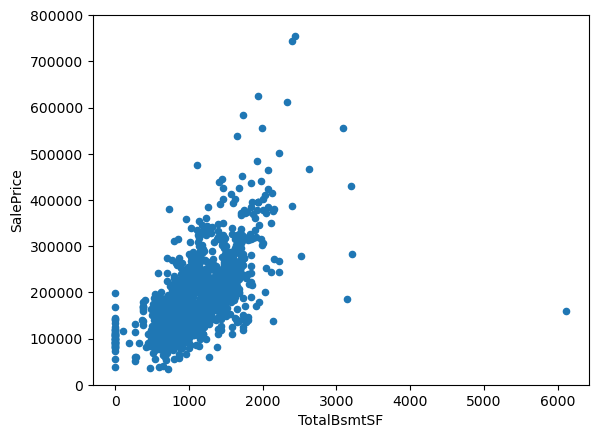

In [10]:
var = 'TotalBsmtSF'
data = pd.concat([shousing['SalePrice'], shousing[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

**Inference:** As anticipated the predictor variable **“TotalBsmtSF:** i.e., Total square feet of basement area has largely a linear relationship with target variable “SalePrice”

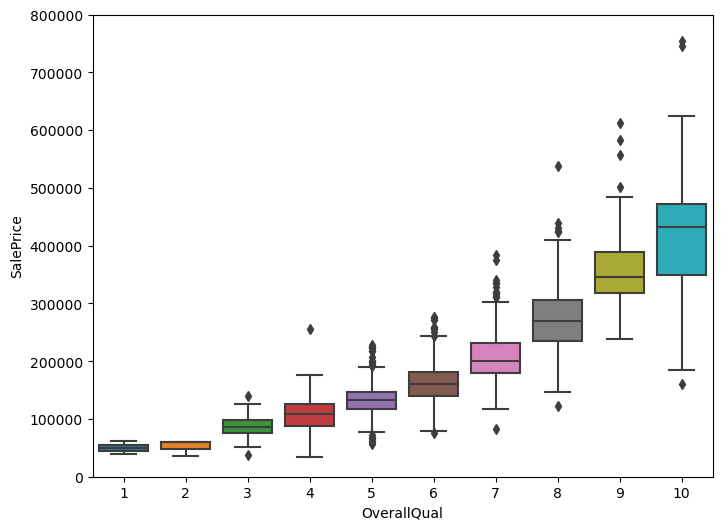

In [11]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([shousing['SalePrice'], shousing[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**Inference:** The predictor variable **“OverallQual”**, which rates the overall material and finish of the house has largely a linear relationship target variable “SalePrice”
- Moreover, the variance steadily increases on the progressing the rating 


### Correlation of matrix

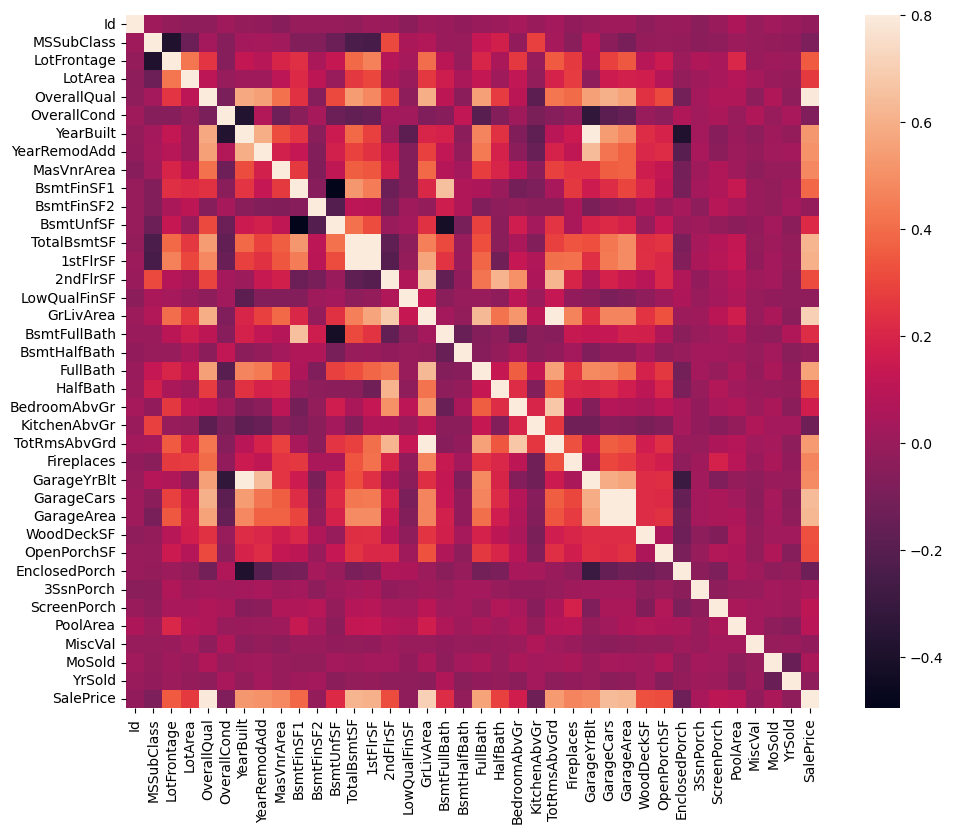

In [12]:
#correlation matrix
corrmat = shousing.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Correlation of matrix of top 10 numerical features

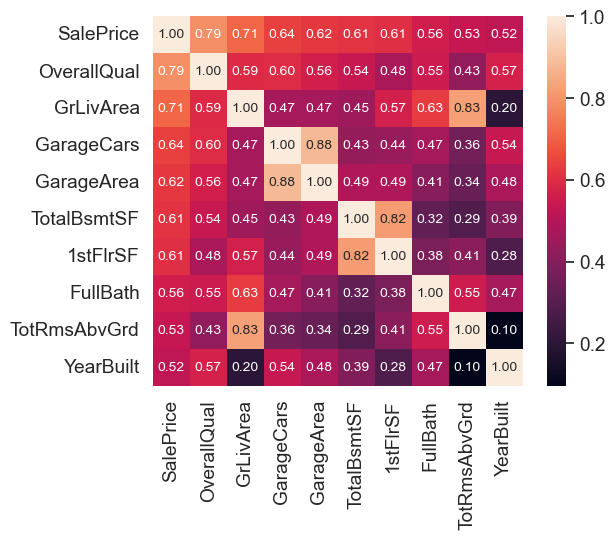

In [13]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(shousing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Inferences from the above correlation matrix

- From the above correlation matrix at least five numerical features have >0.5 correlation with target variable “SalePrice”
- In addition  there do exist multicollinearity between these variables.

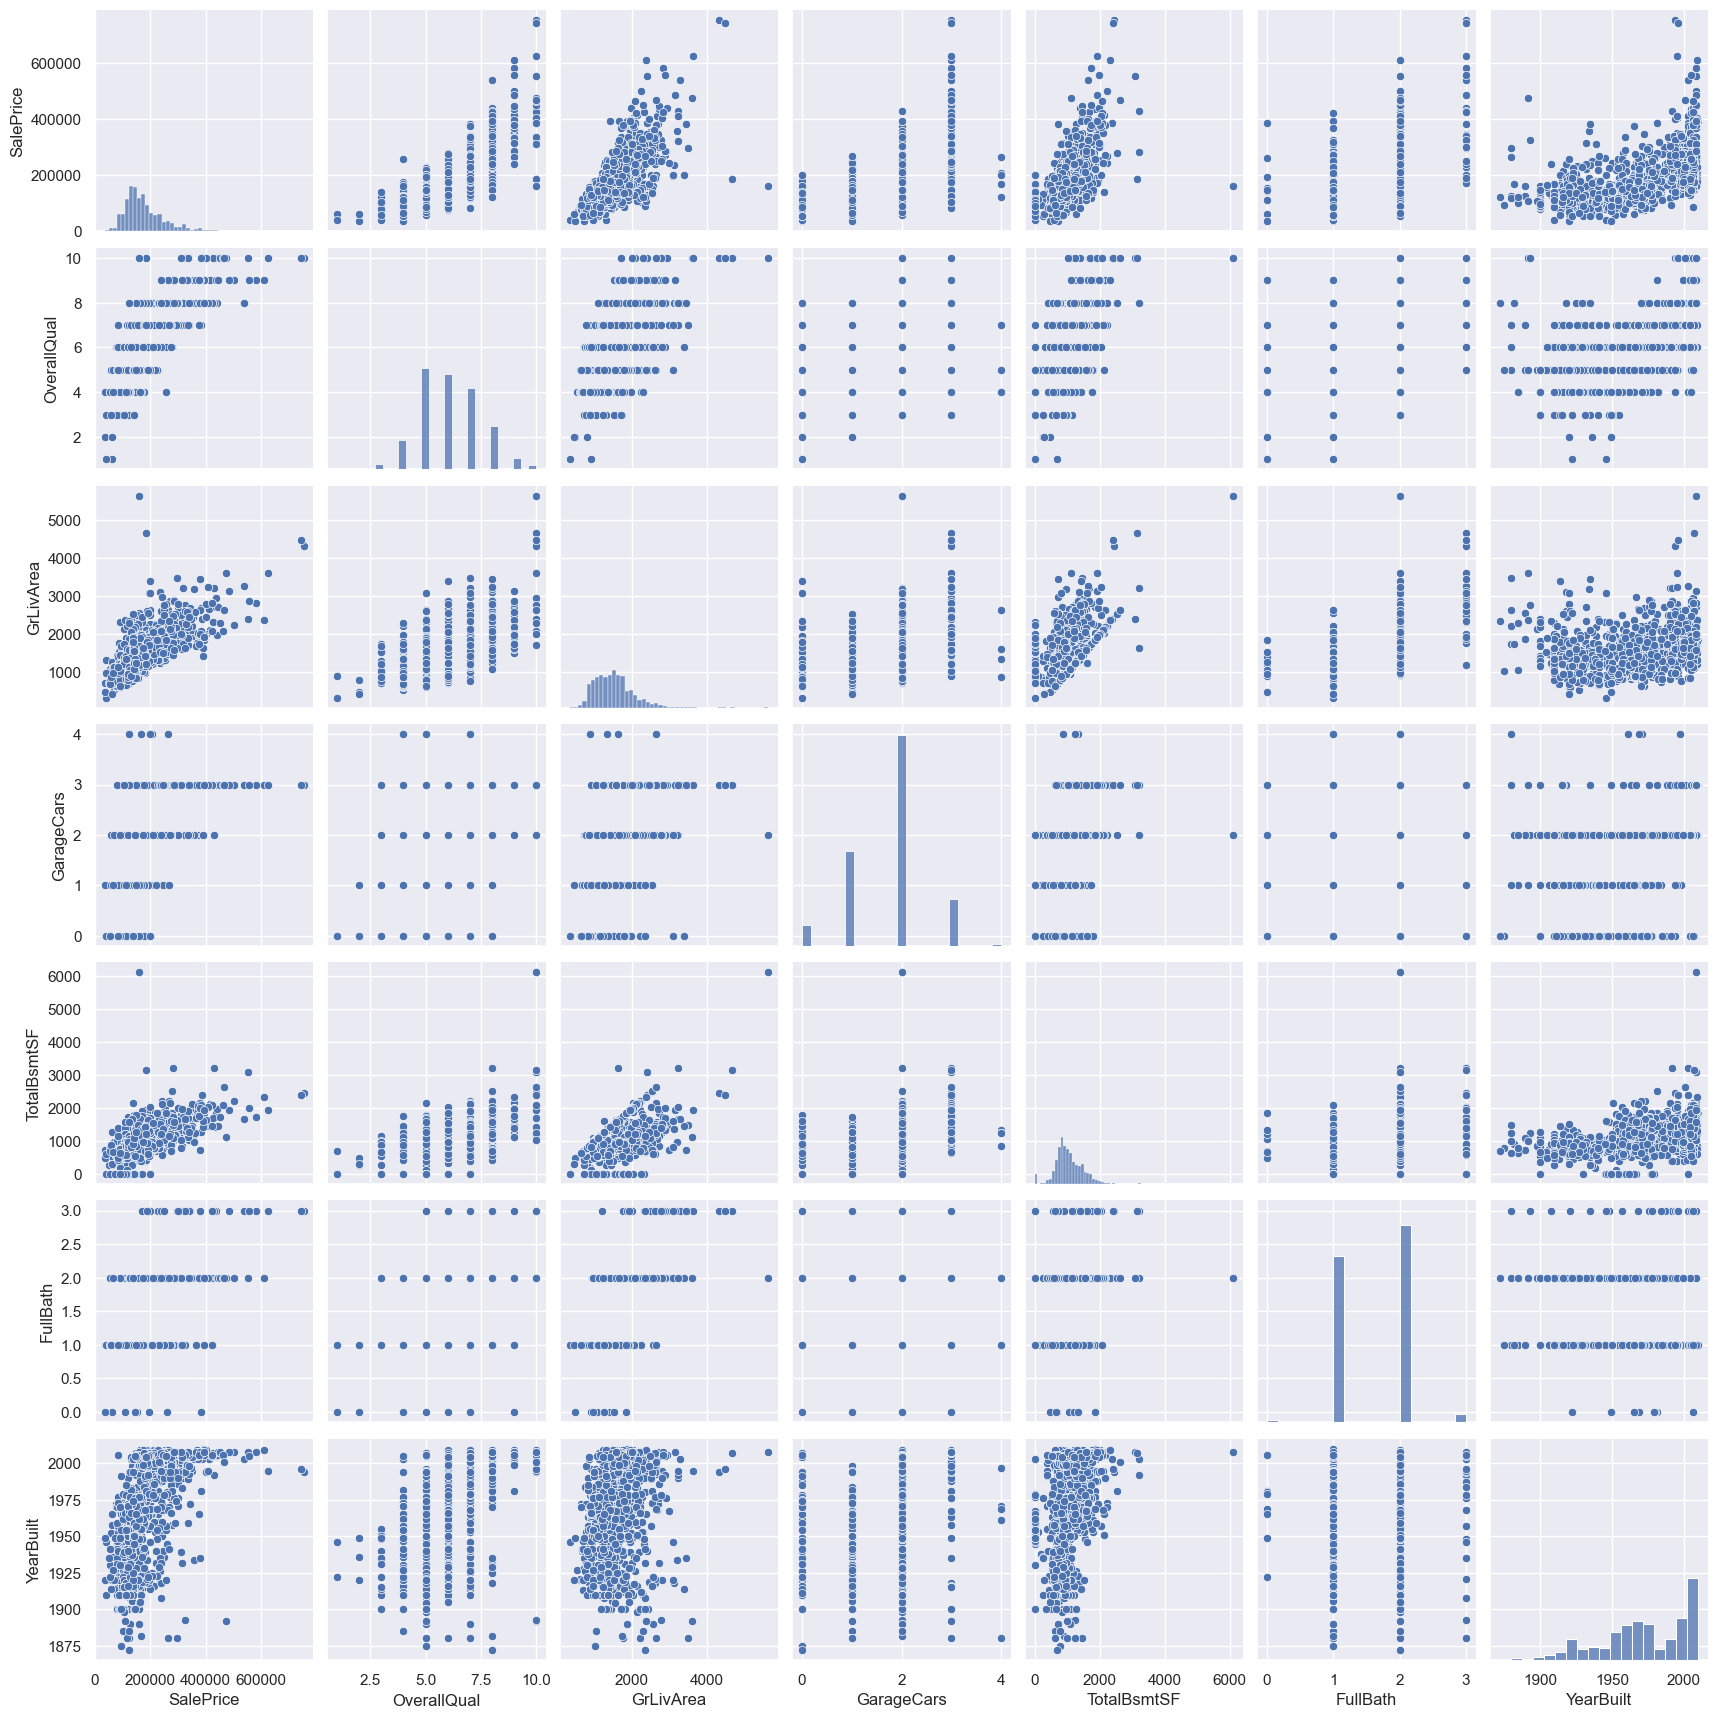

In [14]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(shousing[cols], size = 2.5)
plt.show();


**Inference:** The above scatter plot informs us that  **“OverallQual”, “TotalBsmtSF, “GrLivArea”**, have visible linear relationship with target variable **“SalePrice”**


# Investigating the Missing data

In [15]:
#missing data
total = shousing.isnull().sum().sort_values(ascending=False)
percent = (shousing.isnull().sum()/shousing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


**Inference:**  
- Three variables have >90% missing values. 
- One variables has >80% missing values.
- Two variables have >45% missing values.
- So let us further investigate the data further prior to deciding to dropping them.   


## Imputing Null Values

From the investigation of the data, it was was found that in the cases of features such as "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature", there were not really missing value. 
Rather they were misinterpreted. 
So, in the following we will correctly correlate the data   


In [16]:
#you can find these features on the description data file provided

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [17]:
for i in null_has_meaning:
    shousing[i].fillna("None", inplace=True)
    shousing[i].fillna("None", inplace=True)

In [18]:
shousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Now we can see that after correctly correlating the data most of the information were regained     

## Imputing "Real" NaN Values

These are the real NaN values that we have to deal with accordingly because they were not recorded.

In [19]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy="median")

In [20]:
#missing data
total = shousing.isnull().sum().sort_values(ascending=False)
percent = (shousing.isnull().sum()/shousing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
MasVnrType,872,0.597260
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


LotFrontage has too many Null values and it is a numerical value so it may be better to just drop it.

In [21]:
shousing.drop("LotFrontage", axis=1, inplace=True)

In [22]:
#missing data
total = shousing.isnull().sum().sort_values(ascending=False)
percent = (shousing.isnull().sum()/shousing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
MasVnrType,872,0.597260
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median.

In [23]:
shousing["GarageYrBlt"].fillna(shousing["GarageYrBlt"].median(), inplace=True)
shousing["MasVnrArea"].fillna(shousing["MasVnrArea"].median(), inplace=True)
shousing["MasVnrType"].fillna("None", inplace=True)

In [24]:
#missing data
total = shousing.isnull().sum().sort_values(ascending=False)
percent = (shousing.isnull().sum()/shousing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


In [25]:
shousing.dropna(inplace=True)

In [26]:
#missing data
total = shousing.isnull().sum().sort_values(ascending=False)
percent = (shousing.isnull().sum()/shousing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [27]:
shousing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt    

#### Now we can see that all the missing value are fixed     

#### Now we will determine the data type of all features remaining

In [28]:
types_train = shousing.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [29]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

0
object     43
int64      35
float64     2
Name: count, dtype: int64

In [30]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)
print('The numerical features in our data are :', numerical_values_train)

The numerical features in our data are : ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [31]:
categorical_values_train = list(cat_train.index)
print('The categorical features in our data are :',categorical_values_train)

The categorical features in our data are : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Data Preparation

- Creating feature vectors in order to get the data ready to be fed into our model as training data. This requires us to convert the categorical values into representative numbers.

In [32]:
for i in categorical_values_train:
    feature_set = set(shousing[i])
    for j in feature_set:
        feature_list = list(feature_set)
        shousing.loc[shousing[i] == j, i] = feature_list.index(j)

In [33]:
shousing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,8450,0,0,1,0,0,4,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,4,9600,0,0,1,0,0,1,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,4,11250,0,0,3,0,0,4,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,4,9550,0,0,3,0,0,3,...,0,0,0,0,0,2,2006,0,2,140000
4,5,60,4,14260,0,0,3,0,0,1,...,0,0,0,0,0,12,2008,0,0,250000


#### All the categorical strings are changed  into a representative number. Now the data is ready  to build our models

# Model Building

Now that we've preprocessed and explored our data, we have a much better understanding of the type of data that we're dealing with. Now, we can began to build and test different models for regression to predict the Sale Price of each house.

In [34]:
X = shousing.drop(["Id", "SalePrice"], axis=1).values
y = shousing['SalePrice'].values

In [35]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [36]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8701196473504612
Testing R2
-1.0791593005252342


#### Inference: There is huge difference between the test and train R2 values, suggesting our model is not good, so let us evaluate the model further

# Step 4: Evalauation of the model

## Step 4.1: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [37]:
y_train_pred = lr.predict(X_train)

Text(0.5, 0, 'Errors')

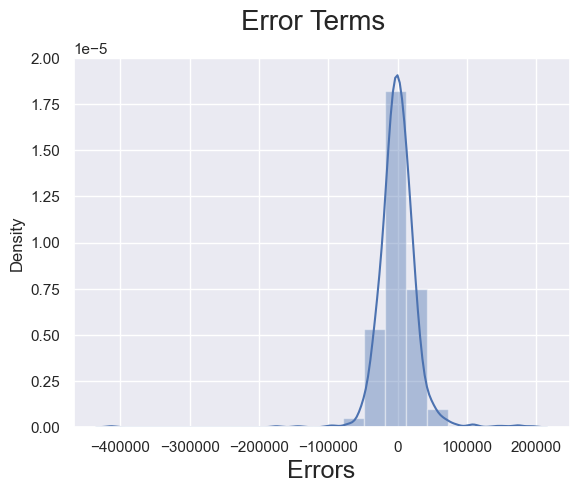

In [38]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

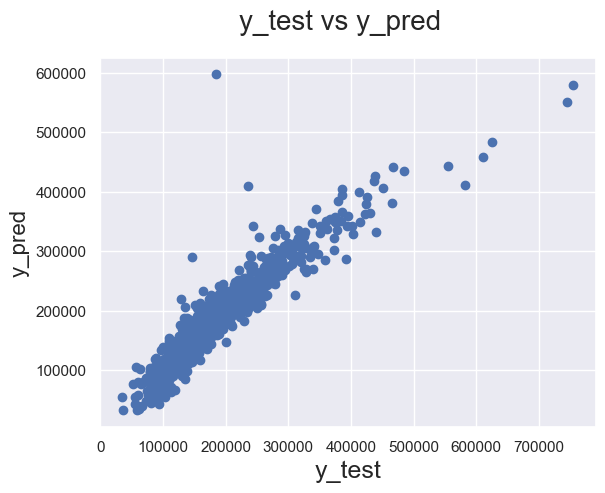

In [39]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

### Test for Homoscedasticity

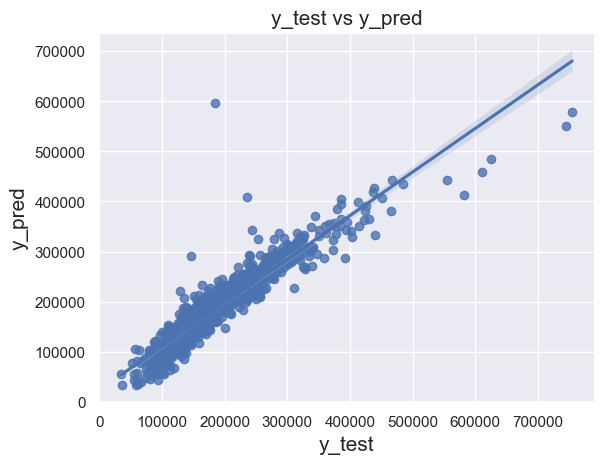

In [40]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('y_test vs y_pred', fontdict={'fontsize': 15})
plt.xlabel('y_test', fontdict={'fontsize': 15})
plt.ylabel('y_pred', fontdict={'fontsize': 15})
plt.show()

#### From the above plot it is evident that there exist a non-linear relationship between predictor and target variable 

### Test for the independency of Error terms

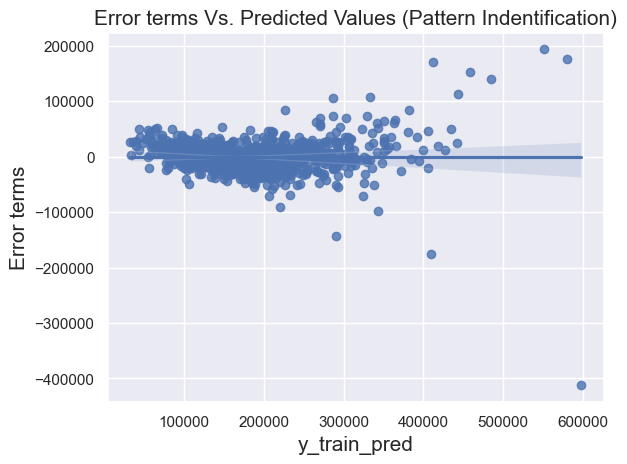

In [41]:
sns.regplot(x=y_train_pred, y=(y_train - y_train_pred))
plt.title('Error terms Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 15})
plt.xlabel('y_train_pred', fontdict={'fontsize': 15})
plt.ylabel('Error terms', fontdict={'fontsize': 15})
plt.show()

**insight:** from the above plot it is evident that Error terms are not independent and follows non-linear trend

<Axes: xlabel='SalePrice', ylabel='Density'>

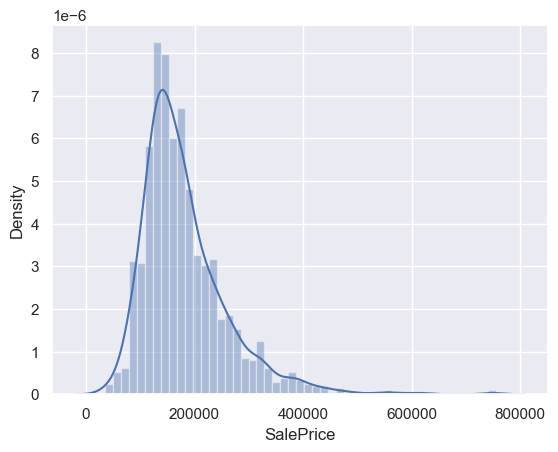

In [42]:
sns.distplot(shousing["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

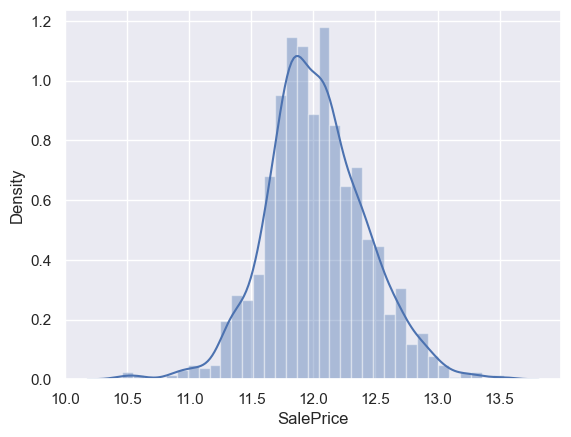

In [43]:
sns.distplot(np.log(shousing["SalePrice"]))

#### It appears that the target variable, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. 

## DATA Transformation

In [44]:
shousing["TranslogSalePrice"] = np.log(shousing["SalePrice"])

In [45]:
y = shousing["TranslogSalePrice"].values

In [46]:
# split into train and test
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [47]:
#Unregularized Model2
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr2 = LinearRegression()
lr2.fit(X_train,y_train)
print("Training R2")
print(lr2.score(X_train,y_train))
print("Testing R2")
print(lr2.score(X_test,y_test))

Training R2
0.9082843444259477
Testing R2
-0.14027589838593735


## Step 4.1: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [48]:
y_train_pred = lr2.predict(X_train)

Text(0.5, 0, 'Errors')

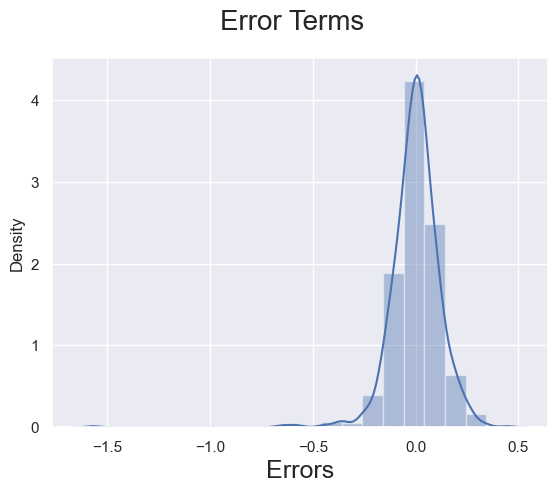

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_pred')

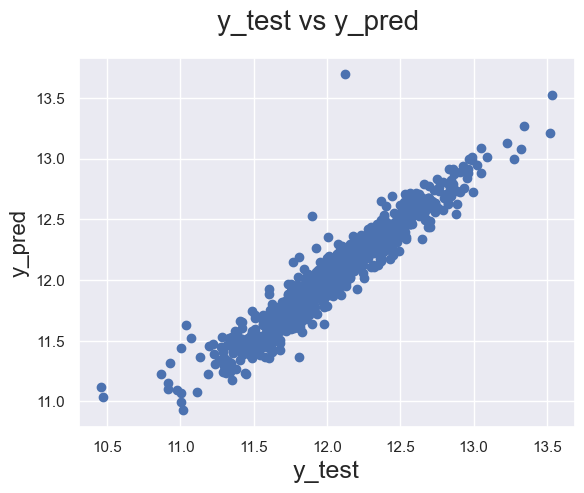

In [50]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

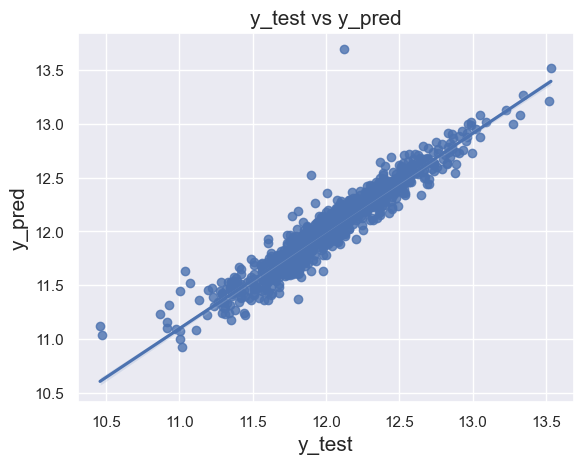

In [51]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('y_test vs y_pred', fontdict={'fontsize': 15})
plt.xlabel('y_test', fontdict={'fontsize': 15})
plt.ylabel('y_pred', fontdict={'fontsize': 15})
plt.show()

#### From the above plot it is evident that now linear relationship between predictor and target variable has been brought

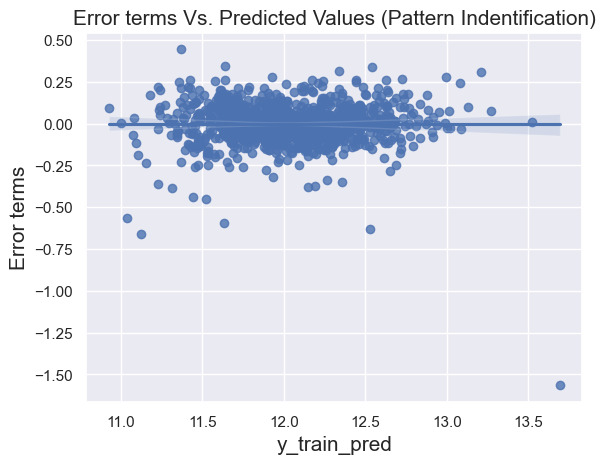

In [52]:
sns.regplot(x=y_train_pred, y=(y_train - y_train_pred))
plt.title('Error terms Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 15})
plt.xlabel('y_train_pred', fontdict={'fontsize': 15})
plt.ylabel('Error terms', fontdict={'fontsize': 15})
plt.show()

**insight:** from the above plot it is evident that now the error terms are independent to eachother

## Lasso Regression

**Lasso Regression with an arbitrary value of alpha** 

In [53]:
lrL = Lasso(alpha=0.9)
lrL.fit(X_train,y_train)
print("Training R2")
print(lrL.score(X_train,y_train))
print("Testing R2")
print(lrL.score(X_test,y_test))

Training R2
0.775065247417162
Testing R2
0.7619793903561821


**Inference:** Now there is much less difference between the test and train R2 values, suggesting our model is good

In [54]:
lrL.coef_

array([-4.20969078e-05,  0.00000000e+00,  1.35881699e-06, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.71041429e-03,  1.30624720e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.79127629e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.96254507e-05,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.73046785e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.67855664e-05, -0.00000000e+00,
        2.80415760e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

**Lasso Regression with a with a range of values of alpha** 

In [55]:
#Generate a list of 50 values between 0 and 2
params = {'alpha': np.linspace(0.2, 2 , num = 100) }

In [56]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [57]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'r2',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.2       , 0.21818182, 0.23636364, 0.25454545, 0.27272727,
       0.29090909, 0.30909091, 0.32727273, 0.34545455, 0.36363636,
       0.38181818, 0.4       , 0.41818182, 0.43636364, 0.45454545,
       0.47272727, 0.49090909, 0.50909091, 0.52727273, 0.54545455,
       0.56363636, 0.58181818, 0.6       , 0.61818182, 0.63636364,
       0.65454545, 0.67272727, 0.69090909,...
       1.47272727, 1.49090909, 1.50909091, 1.52727273, 1.54545455,
       1.56363636, 1.58181818, 1.6       , 1.61818182, 1.63636364,
       1.65454545, 1.67272727, 1.69090909, 1.70909091, 1.72727273,
       1.74545455, 1.76363636, 1.78181818, 1.8       , 1.81818182,
       1.83636364, 1.85454545, 1.87272727, 1.89090909, 1.90909091,
       1.92727273, 1.94545455, 1.96363636, 1.98181818, 2.        ])},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.072180,0.064599,0.001803,0.002179,0.2,{'alpha': 0.2},0.812489,0.801364,0.745074,0.413441,...,0.725862,0.160227,1,0.795541,0.800572,0.818483,0.842665,0.787019,0.808856,0.019791
1,0.038783,0.016103,0.000372,0.000743,0.218182,{'alpha': 0.2181818181818182},0.813690,0.801108,0.743888,0.408377,...,0.724578,0.162099,2,0.794036,0.799618,0.817105,0.841387,0.785696,0.807569,0.019796
2,0.047778,0.015884,0.004014,0.003415,0.236364,{'alpha': 0.2363636363636364},0.815410,0.801623,0.742994,0.404334,...,0.723896,0.163780,3,0.793043,0.799193,0.816046,0.840911,0.784777,0.806794,0.019906
3,0.050094,0.023058,0.004226,0.003585,0.254545,{'alpha': 0.2545454545454546},0.817202,0.802133,0.742775,0.400956,...,0.723599,0.165314,8,0.792496,0.798762,0.815669,0.840530,0.784362,0.806364,0.019940
4,0.035603,0.012272,0.003618,0.006089,0.272727,{'alpha': 0.2727272727272727},0.818681,0.802597,0.742539,0.399520,...,0.723612,0.166049,7,0.791959,0.798329,0.815267,0.840181,0.783915,0.805930,0.019990


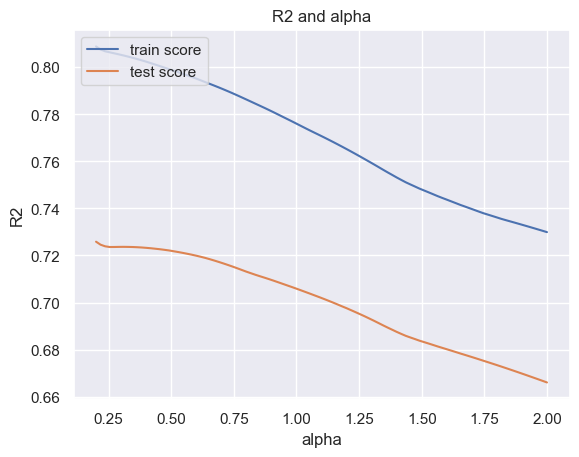

In [59]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Inference:** From the above plot **alpha = 0.5 seems optimal**

In [60]:
alpha = 0.5

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [61]:
lasso.coef_

array([-3.39340967e-04,  0.00000000e+00,  1.52798562e-06, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.90887164e-03,  2.27090250e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.62095643e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        6.12884130e-05,  0.00000000e+00,  4.69016984e-06, -4.66781587e-07,
        1.58214673e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.54730340e-05, -0.00000000e+00,
        2.83702819e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

## Ridge Regression

**Ridge Regression with a with a range of values of alpha** 

In [62]:
#Generate a list of 50 values between 0 and 20
params = {'alpha': np.linspace(0.2, 20 , num = 100) }

In [63]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ,
       11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2,
       13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4,
       15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6,
       17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8,
       20. ])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002908,0.003561,0.000968,0.001937,0.2,{'alpha': 0.2},-0.088883,-0.102477,-0.104543,-0.100397,...,-0.099335,0.005449,1,-0.087394,-0.085394,-0.077807,-0.083076,-0.085212,-0.083777,0.003283
1,0.009475,0.007826,0.000000,0.000000,0.4,{'alpha': 0.4},-0.090840,-0.103731,-0.105602,-0.100285,...,-0.100461,0.005131,2,-0.088614,-0.086911,-0.079332,-0.083115,-0.086746,-0.084944,0.003329
2,0.007871,0.006989,0.000791,0.001582,0.6,{'alpha': 0.6000000000000001},-0.091988,-0.105147,-0.106305,-0.100237,...,-0.101313,0.005103,3,-0.089342,-0.087756,-0.080400,-0.083146,-0.087772,-0.085683,0.003358
3,0.008176,0.005106,0.000000,0.000000,0.8,{'alpha': 0.8},-0.092779,-0.106007,-0.106875,-0.100207,...,-0.101898,0.005112,4,-0.089814,-0.088293,-0.081146,-0.083173,-0.088465,-0.086178,0.003385
4,0.003124,0.006248,0.000000,0.000000,1.0,{'alpha': 1.0},-0.093343,-0.106589,-0.107304,-0.100184,...,-0.102316,0.005130,5,-0.090143,-0.088671,-0.081695,-0.083198,-0.088977,-0.086537,0.003409


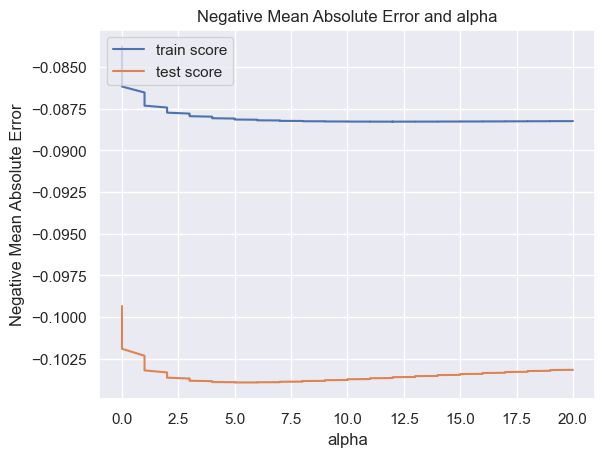

In [65]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Inference:** From the above plot **alpha = 7.5 seems optimal**

In [66]:
alpha = 7.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.30965530e-04,  3.39005570e-03,  1.91364936e-06, -5.23962728e-02,
       -1.49357283e-02,  9.65510958e-03,  3.69107344e-03, -2.73787458e-02,
       -5.14343827e-03, -6.53889056e-03,  3.22473209e-03, -1.93790702e-04,
        1.82192784e-02, -1.44420567e-02,  7.58227931e-03,  6.75340770e-02,
        4.36972691e-02,  2.41972347e-03,  1.17860195e-03,  1.90915016e-02,
       -4.31233304e-04, -1.28883057e-03,  5.67836951e-04, -1.22564455e-03,
        3.85855951e-05, -2.15512575e-02, -1.08745110e-02,  1.06786887e-02,
       -7.28199704e-03, -9.44637999e-03,  2.03821978e-02,  9.22806299e-03,
        2.17935458e-05,  4.94660846e-03, -1.19464874e-05,  1.89926168e-05,
        2.88396736e-05,  1.55730151e-02,  7.72723712e-03,  3.66630786e-02,
        7.38483455e-04,  5.49808921e-05,  5.56632084e-05,  3.53194248e-05,
        1.45963523e-04,  6.81879948e-02,  2.41752439e-02,  5.05996173e-02,
        3.24864258e-02,  6.90137039e-03, -3.03281814e-02,  2.28970728e-02,
        8.73833361e-03, -

In [67]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

In [68]:
y_pred_linear_test = lr2.predict(X_test)
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

### Error distribution for test and train data for with different models 

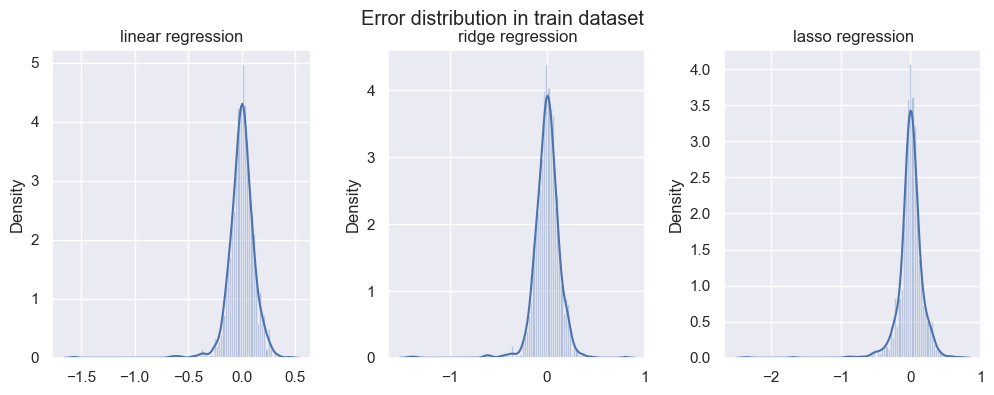

In [69]:
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
sns.distplot((y_train - y_train_pred), bins = 100)
plt.title('linear regression')

plt.subplot(1, 3, 2)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('ridge regression')

plt.subplot(1, 3, 3)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('lasso regression')

plt.suptitle("Error distribution in train dataset")
plt.subplots_adjust(wspace = 0.3)

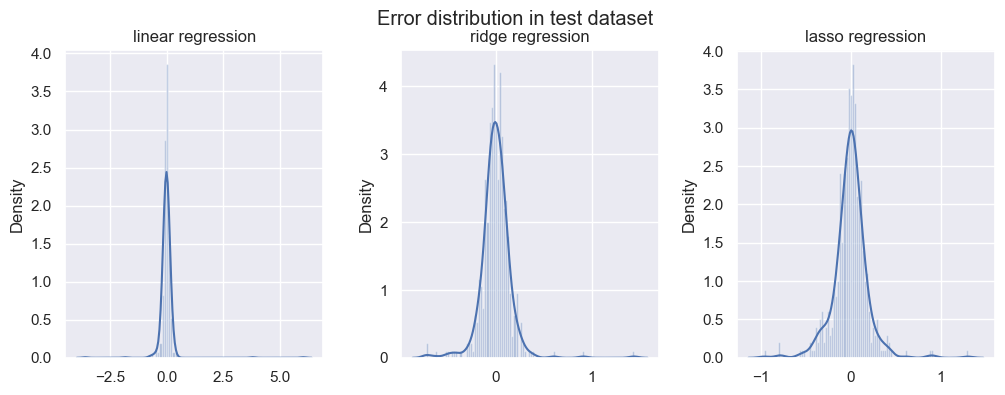

In [70]:
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
sns.distplot((y_test - y_pred_linear_test), bins = 100)
plt.title('linear regression')

plt.subplot(1, 3, 2)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('ridge regression')

plt.subplot(1, 3, 3)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('lasso regression')

plt.suptitle("Error distribution in test dataset")
plt.subplots_adjust(wspace = .3)

### R2 value for test and train data for with different models 

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
print('r2_score for data transformed (log)linear:', round(r2_score(y_train, y_train_pred),2))
print('r2_score for data transformed (log)linear:', round(r2_score(y_test, y_pred_linear_test),2))
print('r2_score for ridge(alpha=7.5):', round(r2_score(y_train, y_pred_ridge_train),2))
print('r2_score for ridge(alpha=7.5):', round(r2_score(y_test, y_pred_ridge_test),2))
print('r2_score for lasso (alpha=0.5):', round(r2_score(y_train, y_pred_lasso_train),2))
print('r2_score for lasso (alpha=0.5):', round(r2_score(y_test, y_pred_lasso_test),2))

r2_score for data transformed (log)linear: 0.91
r2_score for data transformed (log)linear: -0.14
r2_score for ridge(alpha=7.5): 0.89
r2_score for ridge(alpha=7.5): 0.83
r2_score for lasso (alpha=0.5): 0.79
r2_score for lasso (alpha=0.5): 0.75


#### Further Data Analysis for Subjective Questions

In [73]:
Xdf = shousing.drop(["Id", "SalePrice","TranslogSalePrice"], axis=1)
ydf = shousing['SalePrice']

In [74]:
# split into train and test
from sklearn.model_selection import train_test_split
Xdf_train, Xdf_test, ydf_train, ydf_test = train_test_split(Xdf, ydf,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [75]:
betas = pd.DataFrame(index=Xdf_train.columns)
betas.rows = Xdf_train.columns

In [76]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [77]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Ridge,Lasso
MSSubClass,-0.000431,-3.393410e-04
MSZoning,0.003390,0.000000e+00
LotArea,0.000002,1.527986e-06
Street,-0.052396,-0.000000e+00
Alley,-0.014936,-0.000000e+00
LotShape,0.009655,0.000000e+00
LandContour,0.003691,0.000000e+00
Utilities,-0.027379,-0.000000e+00
LotConfig,-0.005143,-0.000000e+00
LandSlope,-0.006539,-0.000000e+00


In [78]:
print(betas['Ridge'].sort_values(ascending=False))

PoolQC           0.140155
BsmtFullBath     0.068188
OverallQual      0.067534
FullBath         0.050600
GarageCars       0.050090
OverallCond      0.043697
CentralAir       0.036663
HalfBath         0.032486
Fireplaces       0.027763
BsmtHalfBath     0.024175
KitchenQual      0.022897
BsmtExposure     0.020382
RoofStyle        0.019092
PavedDrive       0.019023
Condition2       0.018219
Heating          0.015573
Foundation       0.010679
LotShape         0.009655
SaleType         0.009441
BsmtFinType1     0.009228
TotRmsAbvGrd     0.008738
HeatingQC        0.007727
HouseStyle       0.007582
BedroomAbvGr     0.006901
GarageFinish     0.005970
FireplaceQu      0.005214
BsmtFinType2     0.004947
LandContour      0.003691
GarageType       0.003616
MSZoning         0.003390
Neighborhood     0.003225
YearBuilt        0.002420
YearRemodAdd     0.001179
Electrical       0.000738
Exterior2nd      0.000568
ScreenPorch      0.000268
GrLivArea        0.000146
3SsnPorch        0.000144
EnclosedPorc

In [79]:
print(betas['Lasso'].sort_values(ascending=False))

YearBuilt        2.908872e-03
YearRemodAdd     2.270903e-03
GarageArea       3.383629e-04
GrLivArea        2.837028e-04
ScreenPorch      2.026218e-04
WoodDeckSF       1.618782e-04
TotalBsmtSF      1.582147e-04
BsmtFinSF1       6.128841e-05
2ndFlrSF         5.547303e-05
MasVnrArea       3.620956e-05
BsmtFinSF2       4.690170e-06
LotArea          1.527986e-06
MiscVal          1.157077e-06
Fireplaces       0.000000e+00
Functional      -0.000000e+00
TotRmsAbvGrd     0.000000e+00
CentralAir       0.000000e+00
KitchenQual     -0.000000e+00
KitchenAbvGr    -0.000000e+00
FireplaceQu      0.000000e+00
HalfBath         0.000000e+00
FullBath         0.000000e+00
BsmtHalfBath     0.000000e+00
BsmtFullBath     0.000000e+00
BedroomAbvGr    -0.000000e+00
GarageCars       0.000000e+00
GarageType       0.000000e+00
GarageYrBlt      0.000000e+00
GarageFinish     0.000000e+00
GarageQual      -0.000000e+00
GarageCond      -0.000000e+00
PavedDrive       0.000000e+00
OpenPorchSF     -0.000000e+00
EnclosedPo

#### most important factors with lasso with alpha=0.5

-  YearBuilt:        2.908872e-03
-  YearRemodAdd:     2.270902e-03
-  GarageArea:       3.383629e-04
-  GrLivArea:        2.837028e-04
-  ScreenPorch:      2.026218e-04

#### most important factors with Ridge with alpha=7.5

- GarageCars       0.063226
- OverallQual      0.061707
- BsmtFullBath     0.057022
- OverallCond      0.047200
- FullBath         0.038020

In [80]:
alpha = 1

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [81]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  1.30278123e-06, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.66594385e-03,  1.06540866e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.87636468e-05, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.69885872e-05,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.76128183e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.55413941e-05, -0.00000000e+00,
        2.79544741e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [82]:
print(betas['Lasso'].sort_values(ascending=False))

YearBuilt        2.908872e-03
YearRemodAdd     2.270903e-03
GarageArea       3.383629e-04
GrLivArea        2.837028e-04
ScreenPorch      2.026218e-04
WoodDeckSF       1.618782e-04
TotalBsmtSF      1.582147e-04
BsmtFinSF1       6.128841e-05
2ndFlrSF         5.547303e-05
MasVnrArea       3.620956e-05
BsmtFinSF2       4.690170e-06
LotArea          1.527986e-06
MiscVal          1.157077e-06
Fireplaces       0.000000e+00
Functional      -0.000000e+00
TotRmsAbvGrd     0.000000e+00
CentralAir       0.000000e+00
KitchenQual     -0.000000e+00
KitchenAbvGr    -0.000000e+00
FireplaceQu      0.000000e+00
HalfBath         0.000000e+00
FullBath         0.000000e+00
BsmtHalfBath     0.000000e+00
BsmtFullBath     0.000000e+00
BedroomAbvGr    -0.000000e+00
GarageCars       0.000000e+00
GarageType       0.000000e+00
GarageYrBlt      0.000000e+00
GarageFinish     0.000000e+00
GarageQual      -0.000000e+00
GarageCond      -0.000000e+00
PavedDrive       0.000000e+00
OpenPorchSF     -0.000000e+00
EnclosedPo

#### most important factors with lasso with alpha=1

- YearBuilt        2.908871e-03
- YearRemodAdd     2.270902e-03
- GarageArea       3.383629e-04
- GrLivArea        2.837027e-04
- ScreenPorch      2.026218e-04

In [83]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.44670342e-04,  3.88444318e-03,  1.89690034e-06, -3.26456576e-02,
       -1.39550742e-02,  9.68582732e-03,  3.54103073e-03, -1.43910597e-02,
       -5.12251717e-03, -6.09002723e-03,  3.23179188e-03, -3.79005738e-04,
        1.50149421e-02, -1.43788101e-02,  7.51682542e-03,  6.72118246e-02,
        4.33238771e-02,  2.48756711e-03,  1.20827872e-03,  1.86935472e-02,
       -5.20950705e-04, -1.37105051e-03,  5.34402316e-04, -1.06018727e-03,
        3.79019184e-05, -2.12737714e-02, -1.07646952e-02,  1.06911337e-02,
       -6.62686569e-03, -8.99383265e-03,  2.03734284e-02,  9.60444528e-03,
        2.24859076e-05,  5.05730751e-03, -1.12453129e-05,  1.77064208e-05,
        2.89470136e-05,  1.51153125e-02,  7.69003118e-03,  3.36759037e-02,
        1.29652472e-03,  5.22880308e-05,  5.63909264e-05,  4.24340201e-05,
        1.51112976e-04,  6.34336954e-02,  2.03143505e-02,  4.55934040e-02,
        2.90496568e-02,  6.82512927e-03, -2.44178035e-02,  2.20666398e-02,
        8.52960606e-03, -

In [84]:
betas['Ridge'] = ridge.coef_

In [85]:
print(betas['Ridge'].sort_values(ascending=False))

PoolQC           0.072335
OverallQual      0.067212
BsmtFullBath     0.063434
GarageCars       0.047262
FullBath         0.045593
OverallCond      0.043324
CentralAir       0.033676
HalfBath         0.029050
Fireplaces       0.027290
KitchenQual      0.022067
BsmtExposure     0.020373
BsmtHalfBath     0.020314
RoofStyle        0.018694
PavedDrive       0.017347
Heating          0.015115
Condition2       0.015015
Foundation       0.010691
LotShape         0.009686
BsmtFinType1     0.009604
SaleType         0.009097
TotRmsAbvGrd     0.008530
HeatingQC        0.007690
HouseStyle       0.007517
BedroomAbvGr     0.006825
GarageFinish     0.006014
FireplaceQu      0.005600
BsmtFinType2     0.005057
GarageType       0.004095
MSZoning         0.003884
LandContour      0.003541
Neighborhood     0.003232
YearBuilt        0.002488
Electrical       0.001297
YearRemodAdd     0.001208
Exterior2nd      0.000534
ScreenPorch      0.000268
GrLivArea        0.000151
3SsnPorch        0.000148
EnclosedPorc

#### most important factors with Ridge with alpha=15

- OverallQual      0.062432
- GarageCars       0.062148
- BsmtFullBath     0.055727
- OverallCond      0.046666
- FullBath         0.036483

In [86]:
X = shousing.drop(["YearBuilt", "YearRemodAdd", "GarageArea", "GrLivArea", "ScreenPorch","Id", "SalePrice", "TranslogSalePrice"], axis=1).values 
y = shousing['SalePrice'].values

In [87]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [88]:
alpha = 0.5

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [89]:
Xdf = shousing.drop(["YearBuilt", "YearRemodAdd", "GarageArea", "GrLivArea", "ScreenPorch", "Id", "SalePrice", "TranslogSalePrice",], axis=1)
ydf = shousing['SalePrice']
# split into train and test
from sklearn.model_selection import train_test_split
Xdf_train, Xdf_test, ydf_train, ydf_test = train_test_split(Xdf, ydf,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [90]:
betas = pd.DataFrame(index=Xdf_train.columns)
betas.rows = Xdf_train.columns

In [91]:
betas['Lasso'] = lasso.coef_

In [92]:
print(betas['Lasso'].sort_values(ascending=False))

PoolQC           882143.707961
OverallQual       13636.766956
FullBath          11228.200217
GarageCars        10555.018548
BsmtFullBath       9780.827063
KitchenQual        8935.567501
Condition2         7996.583536
Fireplaces         7193.031833
OverallCond        6972.871106
HalfBath           6186.904770
LandSlope          6130.691699
BsmtExposure       5988.538606
Foundation         3800.410546
Heating            3198.807317
SaleType           2831.045335
PavedDrive         2543.775642
TotRmsAbvGrd       2435.720474
ExterQual          1681.247493
LandContour        1328.410280
RoofStyle          1214.513703
LotShape           1088.277531
HeatingQC          1087.550948
BsmtHalfBath        866.552339
GarageCond          844.877336
Condition1          774.500659
GarageFinish        481.338857
BldgType            413.209191
Neighborhood        328.945654
GarageYrBlt         252.772912
Exterior2nd         230.824949
Exterior1st         100.368536
1stFlrSF             48.587005
MasVnrAr

### Conclusions and Business Inferences

**The optimal value of lambda for ridge regression is 7.5 and lasso regression is 0.5**

**On building and comparing few models**

- we found that the variables that are significant in increasing the price of a house are YearBuilt, YearRemodAdd, GarageArea, GrLivArea, and ScreenPorch. 

- While the we found the variables that are significant in decreasing the price of a house are Heating, HeatingQC, BsmtUnfSF, MSSubClass, and PoolArea 

- So, these guides shall be considered while buying a house in low price and selling them at a higher price  
